# Лабораторная работа 5
# Анимация качения треугольника Рело по квадрату. Векторизация вычислений в numpy

Шпак Андрей Валерьевич, 29.07.2022

## Определения и свойства

$\textbf{Треугольник Рело}$ представляет собой область пересечения трех кругов радиуса $r$ с центрами в вершинах равностороннего треугольника с длиной стороны $r$.

Так как треугольник Рело является фигурой постоянной ширины, то его можно вписать в квадрат с длиной стороны, равной $r$ таким образом, что треугольник Рело будет касаться всех сторон квадрата. Это связано с тем, что противоположные стороны квадрата, расстояние между которыми равно $r$, располагаются на опорных прямых к треугольнику Рело.

$\textit{Поступательное движение}$ &mdash; это движение, при котором траектории движения всех точек тела одинаковы. $\textit{Вращательное движение}$ &mdash; это движение, при котором траектории движения точек тела представляют собой окружности (или дуги окружностей) с центрами, лежащими в одной точке.

$\textbf{Качение треугольника Рело по квадрату}$ &mdash; это вращательное движение треугольника относительно своего центра с дополнительным поступательным движением треугольника по траектории, близкой к окружности, чтобы обеспечить касание всех сторон квадрата при движении треугольника Рело.

# Задание 5.1

$\color{red}{Создайте}$  анимацию качения треугольника Рело с шириной $r$ по квадрату с длиной стороны, равной $r$, против часовой стрелки.

Центр квадрата с длиной стороны $r$ располагаем в начале координат.

Качение треугольника Рело происходит за счет его одновременного поступательного и вращательного движения:

1. Полагаем, что при качении по квадрату центр треугольника Рело совершает поступательное движение по окружности с центром в начале координат и заданным радиусом, который необходимо найти. Движение центра треугольника Рело по окружности осуществляется против часовой стрелки.
2. Треугольник Рело совершает также вращательное движение ПО часовой стрелке. Поступательное и вращательные движения согласованы таким образом, что полный оборот центра треугольника Рело на угол $2 \pi$ соответствует вращению треугольника Рело на угол $2 \pi / 3$

## Реализация задания 5.1

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import relo_polygon

# для JupyterLab предварительно нужно установить пакет ipympl
# import matplotlib.animation as anim

from matplotlib.animation import FuncAnimation
%matplotlib widget

### Этап 1. Изображение начального положения треугольника Рело и квадрата в одной графической области

Определим исходные данные для построения треугольника Рело.

Для построения матрицы <code>relo_matrix</code> координат точек-границ треугольника Рело используем функцию <code>regular_polygon_Relo(n, center, r, N)</code> из модуля <code>relo_polygon</code>, созданного в Лабораторной работе 4.

In [2]:
n = 3 # количество вершин треугольника Рело
center = np.array([0.,0.]) # центр треугольника Рело
r = 10 # ширина треугольника Рело
N = 100 # количество точек для описания стороны треугольника Рело

# ВОПРОС: почему вызов именно такой?
# с такими аргументами (r=r, center=center, N=N)
# ОТВЕТ: вызов именно такой, чтобы было понятно, какие значения используются по умолчанию
relo_matrix = relo_polygon.regular_polygon_Relo_from_module(r=r, center=center, N=N)

$\color{red}{Постройте}$ матрицу <code>square</code> для покоординатного описания границы квадрата с длиной стороны $r$ и центром в начале координат

$\color{red}{Изобразите}$ в одной системе координат квадрат, треугольник Рело и точку центра треугольника Рело

In [3]:
square = np.array([[- r / 2, - r / 2], [- r / 2, r / 2], [r / 2, r / 2], [r / 2, - r / 2], [- r / 2, - r / 2]])
square

array([[-5., -5.],
       [-5.,  5.],
       [ 5.,  5.],
       [ 5., -5.],
       [-5., -5.]])

(-5.538675134594813, 6.312177826491073, -5.5, 5.500000000000001)

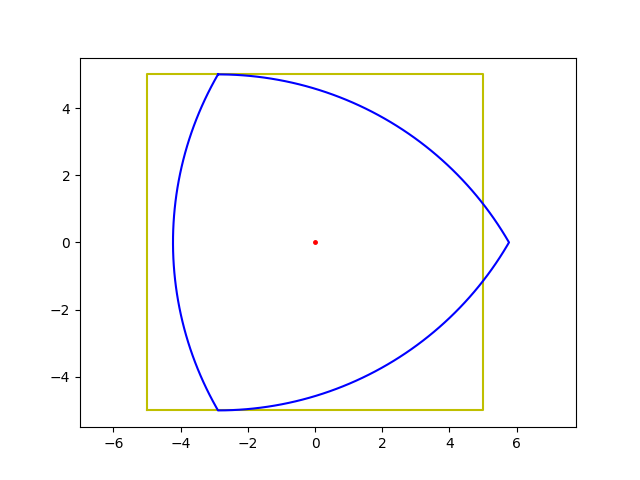

In [4]:
plt.plot(center[0], center[1], 'r.', markersize=5)
plt.plot(square[:,0], square[:,1], 'y-')
plt.plot(relo_matrix[:,0], relo_matrix[:,1], 'b-')
plt.axis('equal')

Треугольник Рело необходимо сдвинуть влево таким образом, чтобы он оказался вписанным в квадрат. Величину вектора сдвига <code>shift</code> $\color{red}{определите}$ $\color{red}{самостоятельно}$.

In [5]:
# посчитал shift как разность координаты радиуса описанной около треугольника окружности и половины стороны квадрата
# чтобы получить координату x смещения

shift = np.array([r / (2 * math.sin(math.pi / n)) - r / 2, 0])
shift

array([0.77350269, 0.        ])

In [6]:
center -= shift
relo_matrix_shifted = relo_matrix - shift

(-5.5, 5.500000000000002, -5.5, 5.500000000000001)

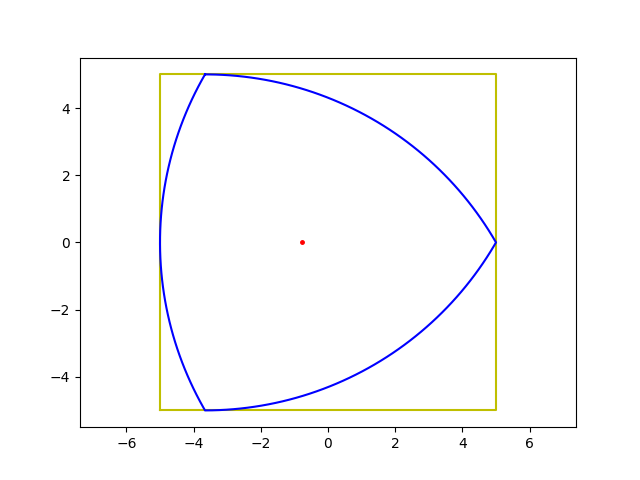

In [8]:
plt.figure()
plt.plot(center[0], center[1], 'r.', markersize=5)
plt.plot(square[:,0], square[:,1], 'y-')
plt.plot(relo_matrix_shifted[:,0], relo_matrix_shifted[:,1], 'b-')
plt.axis('equal')

### Этап 2. Анимация поступательного движения треугольника Рело по заданной траектории

Полагаем, что при качении треугольника Рело по квадрату центр треугольника Рело совершает поступательное движение по окружности с центром в начале координат и радиусом, равным <code>shift[0]</code>, против часовой стрелки.

Зададим количество кадров анимации, необходимое для прохождения центром треугольника Рело полного оборота по окружности

In [9]:
N_frames = 100

Создадим матрицу <code>center_frame</code> из <code>N_frames</code> строк двух столбцов для описания координат точек окружности с центром в начале координат и радиусом <code>shift[0]</code> при обходе окружности против часовой стрелки от $- \pi$ до $\pi$. В первом столбце матрицы расположены $x$-координаты точек, во втором столбце &mdash; $y$ координаты.

In [10]:
# обращаю внимание на векторизацию вычислений с массивами без использования циклов
t_center = np.linspace(- np.pi, np.pi, N_frames)
center_frame = shift[0] * np.transpose([np.cos(t_center), np.sin(t_center)])

Изобразим первый кадр анимации. Для этого в одной графической области изображаем квадрат (сплошная линия синего цвета), вписанный треугольник Рело (сплошная линия красного цвета), центр треугольника Рело (линия по точкам красного цвета) и окружность, по которой будет двигаться центр треугольника Рело (пунктирная линия черного цвета).

(-5.5, 5.500000000000002, -5.5, 5.500000000000001)

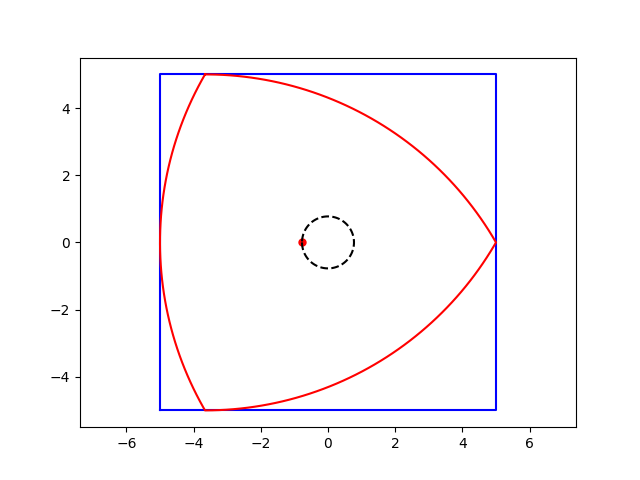

In [11]:
frame = 0
relo_matrix_shifted = relo_matrix + center_frame[frame]

plt.figure()
plt.plot(square[:,0], square[:,1], 'b-')
plt.plot(relo_matrix_shifted[:,0], relo_matrix_shifted[:,1], 'r-')
plt.plot(center_frame[frame,0], center_frame[frame,1], 'r.', markersize=10)
plt.plot(center_frame[:,0], center_frame[:,1], 'k--')
plt.axis('equal')

$\color{red}{Напишите}$ $\color{red}{пользовательскую}$ $\color{red}{функцию}$ трех аргументов <code>draw_frame(r, N_frames, frame)</code>, которая изображает кадр с номером <code>frame</code> для анимации поступательного движения треугольника Рело. Переменные из глобальной области видимости в теле функции использовать нельзя!

- Аргумент <code>r</code> задает ширину треугольника Рело
- Аргумент <code>N_frames</code> задает количества кадров для прохождения центром треугольника Рело полной окружности
- Аргумент <code>frame</code> задает номер кадра. По умолчанию frame=0
- функция осуществляет визуализацию и не возвращает объекты

In [14]:
# func:
# The function to call at each frame. 
# The first argument will be the next value in frames. 
# Any additional positional arguments can be supplied via the fargs parameter.
# из документации, поэтому frame должежен быть первым
def draw_frame(frame, r, N_frames):
    """
    
    """
    
    N_frames = 100
    n = 3 # количество вершин треугольника Рело
    center = np.array([0.,0.]) # центр треугольника Рело
    r = 10 # ширина треугольника Рело
    N = 100 # количество точек для описания стороны треугольника Рело
    relo_matrix = relo_polygon.regular_polygon_Relo_from_module(r=r, center=center, N=N)
    square = np.array([[- r / 2, - r / 2], [- r / 2, r / 2], [r / 2, r / 2], [r / 2, - r / 2], [- r / 2, - r / 2]])
                                                                                                
    shift = np.array([r / (2 * math.sin(math.pi / n)) - r / 2, 0])
                                                                                                
    center -= shift    
    
    t_center = np.linspace(- np.pi, np.pi, N_frames)
    center_frame = shift[0] * np.transpose([np.cos(t_center), np.sin(t_center)])
                                                                                                
    relo_matrix_shifted = relo_matrix + center_frame[frame]

    plt.clf()
    # добавляю plt.clf, так как иначе будет рисоваться очень много кадров, но не убираться    
    plt.plot(square[:,0], square[:,1], 'b-')
    plt.plot(relo_matrix_shifted[:,0], relo_matrix_shifted[:,1], 'r-')
    plt.plot(center_frame[frame,0], center_frame[frame,1], 'r.', markersize=10)
    plt.plot(center_frame[:,0], center_frame[:,1], 'k--')
    plt.axis('equal')
    
    return None

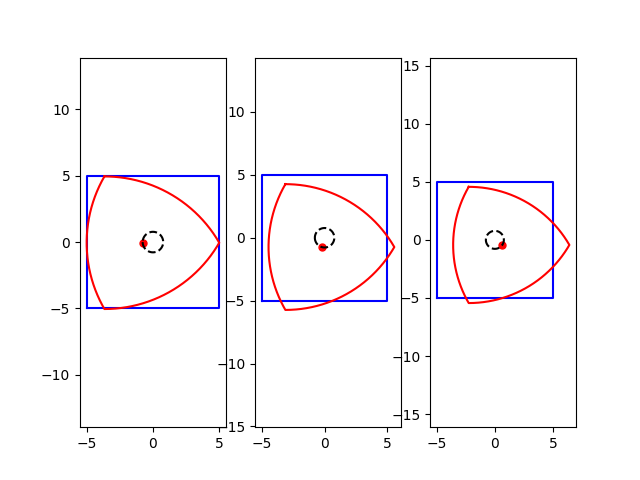

In [13]:
plt.figure()
r = 10
N_frames = 100

# функция subplot() ожидает три параметра:
# количество строк в графике;
# количество столбцов в графике;
# номер ячейки, куда будут выводиться графики, после вызова этой функции
# ячейки нумеруются построчно, начиная с 1
# вызов без plt.clf()

plt.subplot(1, 3, 1)
draw_frame(1, r, N_frames)

plt.subplot(1, 3, 2)
draw_frame(20, r, N_frames)

plt.subplot(1, 3, 3)
draw_frame(40, r, N_frames)

# ВОПРОС: почему изначально использовался именно такой вызов? Зачем?
# plt.subplot(1,3,1)
# draw_frame(r=r, N_frames=N_frames)

# plt.subplot(1,3,2)
# draw_frame(r=r, N_frames=N_frames, frame=20)

# plt.subplot(1,3,3)
# draw_frame(r=r, N_frames=N_frames, frame=40)

$\color{red}{Реализуйте}$ $\color{red}{анимацию}$ поступательного движения треугольника Рело. Для примеров построения анимации с помощью функции <code>FuncAnimation</code> из модуля animation библиотеки matplotlib смотри Лабораторную работу 3.

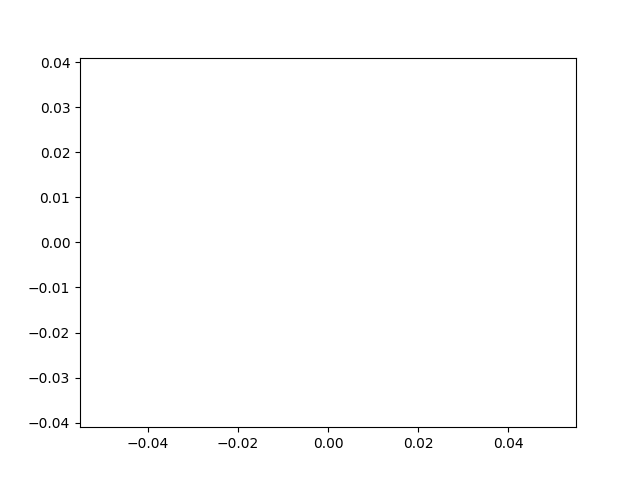

In [15]:
fig_1 = plt.figure()
plt.axis('equal')
r = 10
N_frames = 100

FuncAnimation(fig_1, draw_frame, frames=range(200), fargs=(r, N_frames), repeat=False, interval=40)